# Data exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'axes.facecolor':'GhostWhite', 
            'figure.facecolor':'White',
            'axes.edgecolor':'black', 
            'xtick.color':'DarkSlateGray', 
            'ytick.color':'DarkSlateGray',
            'grid.linestyle': '--',
            'grid.color': 'DarkSlateGray'})

## Load data

In [2]:
df_train = pd.read_csv("./data/test.csv")
df_test = pd.read_csv("./data/train.csv")

### Describe

In [3]:
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3263.0,NaN,NaN,NaN,5427.152927,3146.427221,0.0,2683.0,5500.0,8176.0,10875.0
keyword,3237,221,deluged,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,2158,1602,New York,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,3263,3243,11-Year-Old Boy Charged With Manslaughter of T...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing values

Ploting the number of samples with missing values for each feature.

<AxesSubplot:xlabel='field', ylabel='missing'>

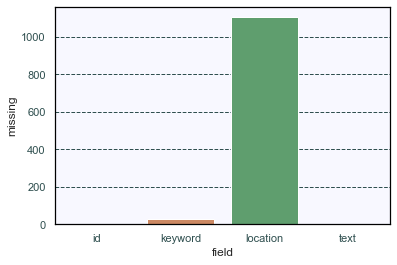

In [4]:
df_missing_train = pd.DataFrame(len(df_train) - df_train.count())
df_missing_train.reset_index(inplace=True)
df_missing_train.columns = ["field", "missing"]

sns.barplot(x="field", y="missing", data=df_missing_train)

For both datasets location is the field with more missing values. Data imputation is hard for both columns, a posible solution to deal with these missing values could be replace null values with "unknown".

In [5]:
df_train["keyword"] = df_train["keyword"].fillna("unknown")

## Explore categorical variables

In [28]:
df_train_location = pd.DataFrame(df_train.groupby("location").size()).reset_index()
df_train_location.columns = ["location", "count"]
df_train_location = df_train_location.sort_values("count", ascending=False)
df_train_location.head()

,location,count
858,New York,38
1278,USA,37
1389,Worldwide,16
1293,United States,15
267,Canada,13


In [29]:
df_train_keyword = pd.DataFrame(df_train.groupby("keyword").size()).reset_index()
df_train_keyword.columns = ["keyword", "count"]
df_train_keyword = df_train_keyword.sort_values("count", ascending=False)
df_train_keyword.head()

,keyword,count
206,unknown,26
64,deluged,23
66,demolished,22
169,rubble,22
181,snowstorm,21
